In [47]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Circle
import random
import pickle
import copy

## Preprocessing

**Reading images from .jpg files**

In [48]:
images=[]
raw_sizes=[]
pathtoimages=r"C:\Users\cesur\Desktop\Applied Ai\Handpose\annotated_frames"
for i in range(1,11):
    for folder in glob.glob(os.path.join(pathtoimages,'data_'+str(i))): 
        for file in glob.glob(os.path.join(folder,'*.jpg')):
            im=Image.open(file)
            raw_sizes.append(im.size)
            image=im.resize((64,64))
            image=np.array(image)
            images.append(copy.copy(image))
            im.close()
print(len(images))
print(np.shape(images[0]))
#plt.imshow(images[0])

42708
(64, 64, 3)


**Reading hand joint labels from .txt files to numpy arrays**

In [49]:
joints=[]
pathtojoints=r"C:\Users\cesur\Desktop\Applied Ai\Handpose\projections_2d"
for i in range(1,11):
    for folder in glob.glob(os.path.join(pathtojoints,'data_'+str(i))):
        for file in glob.glob(os.path.join(folder,'*.txt')):
            f=np.genfromtxt(file)
            lines=[]
            for line in f:
                line=np.delete(line,0)
                line=list(line.flatten())
                lines.append(line)
            joints.append(lines)

len(joints)

42708

**Reading bounding boxes from .txt files to numpy arrays**

In [50]:
bbox=[]
pathtobboxes=r"C:\Users\cesur\Desktop\Applied Ai\Handpose\annotated_frames\bounding_boxes"
for i in range(1,11):
    for folder in glob.glob(os.path.join(pathtobboxes,'data_'+str(i))):
        for file in glob.glob(os.path.join(folder,'*txt')):
            b=np.genfromtxt(file)
            lines=[]
            for line in b:
                line=np.delete(line,0)
                line=list(line.flatten())
                lines.append(line)
            bbox.append(lines)
len(bbox)
bbox=np.array(bbox)

**Cropping hands from images using bounding boxes**

In [51]:
cropped=[]
cropped_sizes=[]
for i,j in enumerate(images):
    w,h=raw_sizes[i]
    T,L,B,R=bbox[i]
    T,L,B,R=T[0]*(64/h),L[0]*(64/w),B[0]*(64/h),R[0]*(64/w)
    im=Image.fromarray(images[i],'RGB')
    cropped.append(im.crop((L,T,L+64,T+64)))
    cropped_sizes.append(cropped[i].size)
len(cropped)
#plt.imshow(cropped[0])

42708

#### **Realigning joint coordinates with cropped images**

In [52]:
print(np.shape(joints))
for i,j in enumerate(joints):
    for k in range(0,21):
        w,h=raw_sizes[i]
        T,L,B,R=bbox[i]
        T,L,B,R=T[0],L[0],B[0],R[0]
        #we need to move joint coordinates top(y axis) and left(x axis)
        joints[i][:][:][k][0]=(joints[i][:][:][k][0]-L)*(64/w)
        joints[i][:][:][k][1]=(joints[i][:][:][k][1]-T)*(64/h)

(42708, 21, 2)


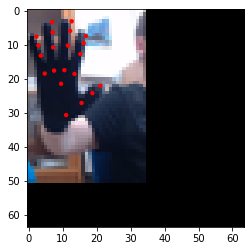

In [53]:
#To check padding and aligning joints
k=random.randint(1,len(cropped))
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
ax.imshow(cropped[k])
for xx,yy in joints[k]:
    circ = Circle((xx,yy),0.5, color = 'red')
    ax.add_patch(circ)

## Pickle

In [54]:
##Save images,labels into arrays to be ready to pickle
cropped_p=[]
for i,item in enumerate(cropped):
    cropped_p.append(np.array(cropped[i]))
cropped_p=np.array(cropped_p) 

joints_p=[]
for i,item in enumerate(joints):
    joints_p.append(np.array(joints[i]))
joints_p=np.array(joints_p) 

print("Shape of image vector:{}\nShape of labels vector:{}".format(np.shape(cropped_p),np.shape(joints_p)))

Shape of image vector:(42708, 64, 64, 3)
Shape of labels vector:(42708, 21, 2)


In [55]:
mydict = {'images':cropped_p,'joints':joints_p}
with open('data_hand_pose_1_11.pickle','wb') as file_to_dump:
    pickle.dump(mydict,file_to_dump)